<a href="https://colab.research.google.com/github/secutron/ShowTime/blob/master/EDA%20steel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('/content/drive/My Drive/Projects/Steel Defect Detection/dataset/folder_wise/train_images')

In [0]:
os.listdir()

['1', '2', '3', '4']

In [0]:
from fastai import *
from fastai.vision import *
from fastai.text import *
from fastai.metrics import error_rate, accuracy
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder('.', train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['1', '2', '3', '4']

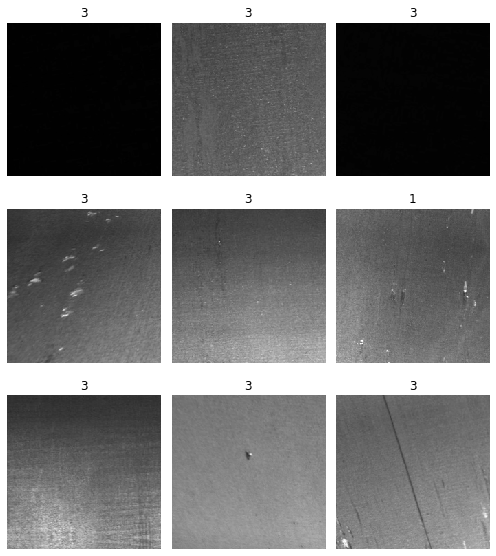

In [0]:
data.show_batch(rows=3, figsize=(7, 8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['1', '2', '3', '4'], 4, 5330, 1332)

In [0]:
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet34,  metrics=accuracy)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [0]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (5330 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
1,1,1,1,1
Path: .;

Valid: LabelList (1332 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
1,3,4,3,3
Path: .;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
       

In [0]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.600417,0.770791,0.730480,04:30
1,0.977962,0.693176,0.719219,04:31
2,0.783901,0.566414,0.784535,04:31
3,0.698138,0.547731,0.777027,04:31


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


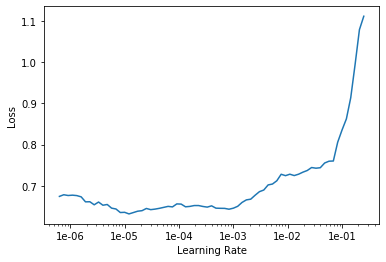

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, max_lr=(1e-5, 1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.640959,0.523259,0.794294,04:33
1,0.606361,0.472675,0.810811,04:36
2,0.550425,0.428284,0.835586,04:36
3,0.522551,0.405002,0.840841,04:34
4,0.502798,0.405242,0.846096,04:37


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


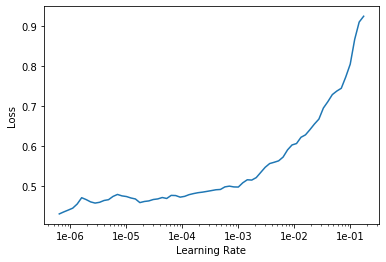

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.save('Steel-Classification-stage-1-acc-84')

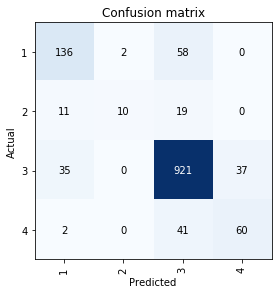

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [0]:
learn.fit_one_cycle(5, max_lr=(1e-6, 1e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.497680,0.394596,0.853604,04:34
1,0.486892,0.401808,0.842342,04:36
2,0.486455,0.401241,0.843844,04:36
3,0.479329,0.398211,0.858859,04:37
4,0.460032,0.392345,0.846847,04:37


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


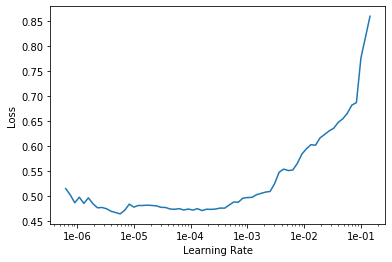

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.save('Steel-Classification-stage-2-acc-85')

In [0]:
# Save pkl
learn.export()